In [158]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

<h3 style='color:#42a1f4;'>1. Sneak Peak to our data</h3>

In [159]:
#sneak peak to our data
dataset = pd.read_csv('C:\\Users\\manish\\Documents\\Data_Science_Projects\\Titanic\\train.csv')

In [160]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [161]:

dataset.shape

(891, 12)

In [162]:

dataset.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [163]:
#we see that 177 values of age is missing so we fill it with median value of ages
dataset['Age'].fillna(dataset['Age'].median(),inplace=True)

In [164]:
#checking it again whether age is filled or not
dataset.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<h3 style='color:#42a1f4'>2. Visualisation</h3>

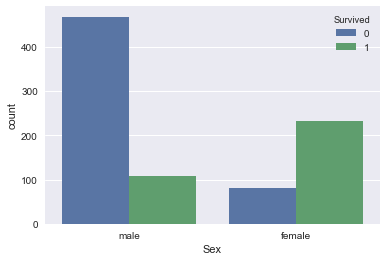

In [165]:
#Explolatory data analysis an d visualisation
sns.countplot(x='Sex',data=dataset,hue='Survived',)

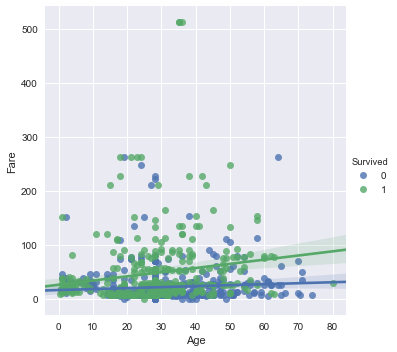

In [166]:
sns.lmplot(x='Age',y='Fare',data=dataset,hue='Survived')

<h3 style='color:#42a1f4'>3. Combining the the two datasets</h3>

In [167]:
def get_combined_data():
    #read training & testing data
    train=pd.read_csv('C:\\Users\\manish\\Documents\\Data_Science_Projects\\Titanic\\train.csv')
    test=pd.read_csv('C:\\Users\\manish\\Documents\\Data_Science_Projects\\Titanic\\test.csv')
    

    #extracting and then removing the targets from the training data 
    #targets = train['Survived']
    train.drop('Survived',axis=1,inplace=True)
    
    #combining train & test data, resetting the index & then dropping index column
    combined=train.append(test)
    combined.reset_index(inplace=True)
    combined.drop('index',axis=1,inplace=True)
    
    return combined

combined = get_combined_data()
    

In [168]:
combined.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [169]:
combined.shape

(1309, 11)

In [170]:
combined.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [171]:
combined.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [172]:
combined.isnull().sum()

PassengerId       0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

<h1 style='color:#42a1f4'>4. Feature Engineering and Data Cleaning</h1>

<h3 style="color:#0d9129;">Getting Title from Names</h3>

In [173]:
def get_titles():
    global combined
    
    combined['Title']= combined['Name'].map(lambda name:name.split(',')[1].split('.')[0].strip())
     
    # combining many titles into smaller categories
    Title_Dictionary = {
                        "Capt":       "Officer",
                        "Col":        "Officer",
                        "Major":      "Officer",
                        "Jonkheer":   "Royalty",
                        "Don":        "Royalty",
                        "Sir" :       "Royalty",
                        "Dr":         "Officer",
                        "Rev":        "Officer",
                        "the Countess":"Royalty",
                        "Dona":       "Royalty",
                        "Mme":        "Mrs",
                        "Mlle":       "Miss",
                        "Ms":         "Mrs",
                        "Mr" :        "Mr",
                        "Mrs" :       "Mrs",
                        "Miss" :      "Miss",
                        "Master" :    "Master",
                        "Lady" :      "Royalty"
                        }
    combined['Title']=combined.Title.map(Title_Dictionary)

In [174]:
#x = 'Braund, Mr. Owen Harris'
#y=x.split(',')
#y[1]
#z=y[1].split('.')
#z[0].strip()
get_titles()

In [175]:
combined.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


<h3 style="color:#0d9129;">Processing & filling missing value of Age</h3>

In [176]:
#263 values of ages are missing from our combined data We cannot fill median value of age directly bcoz median age
#is different for different values of sex ,Pclass,Title  

grouped_median_train = combined.head(891).groupby(['Sex','Pclass','Title']).median()
grouped_median_train

PassengerId   Age  SibSp  Parch       Fare
Sex    Pclass Title                                              
female 1      Miss           369.0  30.0    0.0    0.0   88.25000
              Mrs            499.0  40.0    1.0    0.0   79.20000
              Officer        797.0  49.0    0.0    0.0   25.92920
              Royalty        658.5  40.5    0.5    0.0   63.05000
       2      Miss           437.5  24.0    0.0    0.0   13.00000
              Mrs            439.5  31.5    1.0    0.0   26.00000
       3      Miss           372.0  18.0    0.0    0.0    8.75625
              Mrs            405.5  31.0    1.0    1.0   15.97500
male   1      Master         446.0   4.0    1.0    2.0  120.00000
              Mr             463.0  40.0    0.0    0.0   42.40000
              Officer        648.0  51.0    0.0    0.0   35.50000
              Royalty        600.0  40.0    0.0    0.0   27.72080
       2      Master         408.0   1.0    1.0    1.0   26.00000
              Mr             440.0  31.0    0.0    0.0   13.00000
              Officer        358.5  46.5    0.0    0.0   13.00000
       3      Master         270.5   4.0    3.5    1.0   28.51250
              Mr             472.0  26.0    0.0    0.0    7.89580

In [177]:
grouped_median_test=combined.iloc[891:].groupby(['Sex','Pclass','Title']).median()
grouped_median_test


PassengerId   Age  SibSp  Parch       Fare
Sex    Pclass Title                                              
female 1      Miss          1074.0  32.0    0.0    0.0  158.20835
              Mrs           1076.0  48.0    1.0    0.0   63.35830
              Royalty       1306.0  39.0    0.0    0.0  108.90000
       2      Miss          1121.0  19.5    1.0    1.0   24.50000
              Mrs           1123.5  29.0    0.0    0.0   26.00000
       3      Miss          1090.5  22.0    0.0    0.0    7.87920
              Mrs           1048.0  28.0    1.0    0.5   14.28125
male   1      Master        1022.0   9.5    1.0    2.0  198.43750
              Mr            1102.0  42.0    0.0    0.0   50.24790
              Officer       1094.0  53.0    1.0    0.0   81.85830
       2      Master        1033.5   5.0    0.5    1.5   27.75000
              Mr            1156.0  28.0    0.0    0.0   13.00000
              Officer       1048.5  35.5    0.5    0.5   19.50000
       3      Master        1173.0   7.0    1.0    1.0   15.24580
              Mr            1101.0  25.0    0.0    0.0    7.85420

In [178]:
def fillAges(row, grouped_median):
        if row['Sex']=='female' and row['Pclass'] == 1:
            if row['Title'] == 'Miss':
                return grouped_median.loc['female', 1, 'Miss']['Age']
            elif row['Title'] == 'Mrs':
                return grouped_median.loc['female', 1, 'Mrs']['Age']
            elif row['Title'] == 'Officer':
                return grouped_median.loc['female', 1, 'Officer']['Age']
            elif row['Title'] == 'Royalty':
                return grouped_median.loc['female', 1, 'Royalty']['Age']

        elif row['Sex']=='female' and row['Pclass'] == 2:
            if row['Title'] == 'Miss':
                return grouped_median.loc['female', 2, 'Miss']['Age']
            elif row['Title'] == 'Mrs':
                return grouped_median.loc['female', 2, 'Mrs']['Age']

        elif row['Sex']=='female' and row['Pclass'] == 3:
            if row['Title'] == 'Miss':
                return grouped_median.loc['female', 3, 'Miss']['Age']
            elif row['Title'] == 'Mrs':
                return grouped_median.loc['female', 3, 'Mrs']['Age']

        elif row['Sex']=='male' and row['Pclass'] == 1:
            if row['Title'] == 'Master':
                return grouped_median.loc['male', 1, 'Master']['Age']
            elif row['Title'] == 'Mr':
                return grouped_median.loc['male', 1, 'Mr']['Age']
            elif row['Title'] == 'Officer':
                return grouped_median.loc['male', 1, 'Officer']['Age']
            elif row['Title'] == 'Royalty':
                return grouped_median.loc['male', 1, 'Royalty']['Age']

        elif row['Sex']=='male' and row['Pclass'] == 2:
            if row['Title'] == 'Master':
                return grouped_median.loc['male', 2, 'Master']['Age']
            elif row['Title'] == 'Mr':
                return grouped_median.loc['male', 2, 'Mr']['Age']
            elif row['Title'] == 'Officer':
                return grouped_median.loc['male', 2, 'Officer']['Age']

        elif row['Sex']=='male' and row['Pclass'] == 3:
            if row['Title'] == 'Master':
                return grouped_median.loc['male', 3, 'Master']['Age']
            elif row['Title'] == 'Mr':
                return grouped_median.loc['male', 3, 'Mr']['Age']
    
combined.head(891).Age = combined.head(891).apply(lambda i : fillAges(i, grouped_median_train) if np.isnan(i['Age']) 
                                              else i['Age'], axis=1)
    
combined.iloc[891:].Age = combined.iloc[891:].apply(lambda i : fillAges(i, grouped_median_test) if np.isnan(i['Age']) 
                                                      else i['Age'], axis=1)

In [179]:
combined.isnull().sum()

PassengerId       0
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
Title             0
dtype: int64

<h3 style="color:#0d9129;">Processing the names</h3>

In [180]:
combined.drop('Name',1,inplace=True)

In [181]:
combined = pd.get_dummies(combined,columns=['Title'],drop_first=True)

<h3 style="color:#0d9129;">Processing Plcass</h3>

In [182]:
combined=pd.get_dummies(combined,columns=['Pclass'],drop_first=True)

<h3 style="color:#0d9129;">Filling missing value of Fares</h3>

In [183]:
combined.Fare.fillna(combined.head(891).Fare.mean(),inplace=True)

<h3 style="color:#0d9129;">Processing & filling missing value of embarked</h3>

In [184]:
combined['Embarked'].value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [185]:
#only 2 values of embarked is missing ,filling it with most frequent one
combined.Embarked.fillna('S',inplace=True)

combined=pd.get_dummies(combined,columns=['Embarked'],drop_first=True)

<h3 style="color:#0d9129;">Processing & filling missing value of Cabin</h3>

In [186]:
#replacing missing cabins with U (for Uknown)
combined.Cabin.fillna('U',inplace=True)

#mapping each Cabin value with the cabin letter
combined['Cabin']=combined['Cabin'].map(lambda i:i[0])

combined = pd.get_dummies(combined,columns=['Cabin'],drop_first=True)

<h3 style="color:#0d9129;">Processing Family</h3>

In [187]:
def process_family():
    # introducing a new feature ,''size of families'' (including the passenger)
    combined['FamilySize'] = combined['Parch'] + combined['SibSp'] + 1
    
    # introducing other features based on the family size
    combined['Singleton'] = combined['FamilySize'].map(lambda s: 1 if s == 1 else 0)
    combined['SmallFamily'] = combined['FamilySize'].map(lambda s: 1 if 2<=s<=4 else 0)
    combined['LargeFamily'] = combined['FamilySize'].map(lambda s: 1 if 5<=s else 0)

In [188]:
process_family()

<h3 style="color:#0d9129;">Processing Sex</h3>

In [189]:
combined = pd.get_dummies(combined,columns=['Sex'],drop_first=True)

<h3 style="color:#0d9129;">Processing Ticket</h3>

In [190]:
for k in range(0,1309):
    combined['Ticket'].iloc[k]=combined['Ticket'].iloc[k][0].strip('0123456789')  

In [191]:
combined = combined.replace('','X')

In [192]:
combined  = pd.get_dummies(combined,columns=['Ticket'],drop_first=True)

In [193]:
combined.drop('PassengerId', inplace=True, axis=1)

<h3 style="color:#0d9129;">Adding Feature Interactions</h3>

In [91]:
from itertools import combinations
from sklearn.preprocessing import PolynomialFeatures

def add_interactions(combined):
    # Get feature names
    combos = list(combinations(list(combined.columns), 2))
    colnames = list(combined.columns) + ['_'.join(x) for x in combos]
    
    # Find interactions
    poly = PolynomialFeatures(interaction_only=True, include_bias=False)
    combined = poly.fit_transform(combined)
    combined = pd.DataFrame(combined)
    combined.columns = colnames
    
    # Remove interaction terms with all 0 values            
    noint_indicies = [i for i, x in enumerate(list((combined == 0).all())) if x]
    combined = combined.drop(combined.columns[noint_indicies], axis=1)
    
    return combined

In [92]:
combined = add_interactions(combined)
print(combined.head(5))

    Age  SibSp  Parch     Fare  Title_Miss  Title_Mr  Title_Mrs  \
0  22.0    1.0    0.0   7.2500         0.0       1.0        0.0   
1  38.0    1.0    0.0  71.2833         0.0       0.0        1.0   
2  26.0    0.0    0.0   7.9250         1.0       0.0        0.0   
3  35.0    1.0    0.0  53.1000         0.0       0.0        1.0   
4  35.0    0.0    0.0   8.0500         0.0       1.0        0.0   

   Title_Officer  Title_Royalty  Pclass_2        ...          \
0            0.0            0.0       0.0        ...           
1            0.0            0.0       0.0        ...           
2            0.0            0.0       0.0        ...           
3            0.0            0.0       0.0        ...           
4            0.0            0.0       0.0        ...           

   LargeFamily_Ticket_P  LargeFamily_Ticket_W  LargeFamily_Ticket_X  \
0                   0.0                   0.0                   0.0   
1                   0.0                   0.0                   0.0   

In [194]:
combined.head()

,Age,SibSp,Parch,Fare,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty,Pclass_2,...,SmallFamily,LargeFamily,Sex_male,Ticket_C,Ticket_F,Ticket_L,Ticket_P,Ticket_S,Ticket_W,Ticket_X
0,22.0,1,0,7.2500,0,1,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
1,38.0,1,0,71.2833,0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
2,26.0,0,0,7.9250,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,35.0,1,0,53.1000,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1
4,35.0,0,0,8.0500,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


<h3 style="color:#0d9129;">Dimensionality Reduction</h3>

In [195]:
def recover_train_test_target():
    
    train2 = pd.read_csv('C:\\Users\\manish\\Documents\\Data_Science_Projects\\Titanic\\train.csv')
    
    targets = train2['Survived']
    train = combined.head(891)
    test = combined.iloc[891:]
    
    return train, test, targets

train, test, targets = recover_train_test_target()

<h2 style='color:#42a1f4'>4. Feature Selection</h2>

In [153]:
from sklearn.feature_selection import SelectFromModel
from sklearn.cross_validation import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
classifier  = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=8, max_features='log2', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=3, min_weight_fraction_leaf=0.0,
            n_estimators=50, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)
classifier = classifier.fit(train, targets)

In [154]:
model = SelectFromModel(classifier, prefit=True)
train_reduced = model.transform(train)
train_reduced.shape

(891, 9)

In [155]:
test_reduced = model.transform(test)
test_reduced.shape

(418, 9)

<h2 style='color:#42a1f4'>5. Modelling</h2>

In [198]:
from sklearn.ensemble import RandomForestClassifier
classifier= RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=8, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=10, min_weight_fraction_leaf=0.0,
            n_estimators=50, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)
classifier = classifier.fit(train, targets)

In [197]:
from sklearn.grid_search import GridSearchCV
parameter_grid = {
                 'max_depth' : [1,2,3,4, 6, 8],
                 'criterion' : ['gini','entropy'],  
                 'n_estimators': [50, 10,],
                 'max_features': ['sqrt', 'auto', 'log2'],
                 'min_samples_split': [2, 3,6, 10],
                 'min_samples_leaf': [1, 3,6, 10],
                 'bootstrap': [True, False],
                 }
cross_validation = StratifiedKFold(targets, n_folds=5)
grid_search = GridSearchCV(classifier,scoring='accuracy',param_grid=parameter_grid,cv=10)
model = grid_search

grid_search.fit(train, targets)
parameters = grid_search.best_params_

print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))


model = RandomForestClassifier(**parameters)
model.fit(train, targets)


Best score: 0.8417508417508418
Best parameters: {'bootstrap': True, 'criterion': 'gini', 'max_depth': 8, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 50}


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=8, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=10, min_weight_fraction_leaf=0.0,
            n_estimators=50, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [199]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier,scoring ='accuracy',X = train, y = targets, cv = 10)
accuracies.mean()

0.82490182726137762

In [200]:
#df = pd.DataFrame({'Survived':y_pred},index=test['PassengerId'])
output = classifier.predict(test).astype(int)
df_output=pd.DataFrame()
aux = pd.read_csv('C:\\Users\\manish\\Documents\\Data_Science_Projects\\Titanic\\test.csv')
df_output['PassengerId'] = aux['PassengerId']
df_output['Survived'] = output
df_output[['PassengerId','Survived']].to_csv('output.csv',index=False)